In [1]:
from config_figures import *

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [3]:
df = pd.read_csv(google_drive_path + '/nmds_pca_data.csv').drop(['system:index', '.geo'], axis=1)
evopca = pd.read_csv('../../evopca_df.csv').rename(columns={'Axis1':'evopca1', 'Axis2':'evopca2', 'Axis3':'evopca3'})
df = df.merge(evopca)
df

,CHELSA_bio12_1981_2010_V2_1,CHELSA_bio15_1981_2010_V2_1,CHELSA_bio1_1981_2010_V2_1,CHELSA_bio4_1981_2010_V2_1,CHELSA_gsl_1981_2010_V2_1,CHELSA_npp_1981_2010_V2_1,MDS1,MDS2,MDS3,SG_Coarse_fragments_005cm,SG_Silt_Content_005cm,SG_Soil_pH_H2O_005cm,x,y,evopca1,evopca2,evopca3
0,36432.962700,210.218000,2978.865000,502.012200,365.000000,25079.295200,0.647776,-0.294345,0.109215,1.709484,22.444225,42.883077,-85.5,0.5,-0.203114,-0.110316,-0.109411
1,35478.439800,194.474800,2980.997700,473.100500,365.000000,25182.618500,0.613397,-0.362359,0.128936,1.209468,23.118284,42.494265,-84.5,0.5,-0.200630,-0.105294,-0.115464
2,35496.315200,173.247700,2980.079300,450.927800,365.000000,25137.881300,0.650375,-0.368078,0.069564,1.495468,22.953371,42.309594,-83.5,0.5,-0.202350,-0.105612,-0.112564
3,35084.596800,177.327300,2982.499900,449.689900,365.000000,25254.789500,0.688352,-0.280964,0.089301,0.661833,23.515853,42.042120,-82.5,0.5,-0.195576,-0.103767,-0.119640
4,32617.759800,183.492400,2984.814600,454.145500,365.000000,25356.537500,0.597050,-0.399280,0.129519,0.530261,25.933236,41.885098,-81.5,0.5,-0.197449,-0.111415,-0.126746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,1716.277738,1513.217449,3005.424562,6376.340967,22.944675,3114.175398,0.056760,-0.164505,0.400103,5.890789,27.957657,81.449219,81.5,-31.5,0.126620,0.169220,-0.139234
19531,1537.967800,1515.383700,3004.894100,6327.741600,19.695400,2811.281600,-0.117749,-0.119079,0.269884,3.329121,35.510186,81.519485,82.5,-31.5,0.097319,0.100516,-0.170564
19532,1933.259926,1395.662266,3009.442144,5963.205021,25.543554,3489.118912,-0.419090,1.125502,0.401477,8.571797,19.830088,82.192502,83.5,-31.5,0.130782,0.173807,-0.047381
19533,2393.251600,1432.761000,3005.800100,5760.749000,33.727100,4258.774800,0.668452,1.380589,1.831384,9.597962,18.879776,82.256771,84.5,-31.5,0.082007,0.185947,-0.060640


In [4]:
df_covs = df.drop(['MDS1','MDS2','MDS3','evopca1','evopca2','evopca3','x','y'], axis=1)
df_covs

,CHELSA_bio12_1981_2010_V2_1,CHELSA_bio15_1981_2010_V2_1,CHELSA_bio1_1981_2010_V2_1,CHELSA_bio4_1981_2010_V2_1,CHELSA_gsl_1981_2010_V2_1,CHELSA_npp_1981_2010_V2_1,SG_Coarse_fragments_005cm,SG_Silt_Content_005cm,SG_Soil_pH_H2O_005cm
0,36432.962700,210.218000,2978.865000,502.012200,365.000000,25079.295200,1.709484,22.444225,42.883077
1,35478.439800,194.474800,2980.997700,473.100500,365.000000,25182.618500,1.209468,23.118284,42.494265
2,35496.315200,173.247700,2980.079300,450.927800,365.000000,25137.881300,1.495468,22.953371,42.309594
3,35084.596800,177.327300,2982.499900,449.689900,365.000000,25254.789500,0.661833,23.515853,42.042120
4,32617.759800,183.492400,2984.814600,454.145500,365.000000,25356.537500,0.530261,25.933236,41.885098
...,...,...,...,...,...,...,...,...,...
19530,1716.277738,1513.217449,3005.424562,6376.340967,22.944675,3114.175398,5.890789,27.957657,81.449219
19531,1537.967800,1515.383700,3004.894100,6327.741600,19.695400,2811.281600,3.329121,35.510186,81.519485
19532,1933.259926,1395.662266,3009.442144,5963.205021,25.543554,3489.118912,8.571797,19.830088,82.192502
19533,2393.251600,1432.761000,3005.800100,5760.749000,33.727100,4258.774800,9.597962,18.879776,82.256771


In [5]:
df_st = StandardScaler().fit_transform(df_covs)
pcamodel = PCA(n_components=2)
pca = pd.DataFrame(pcamodel.fit_transform(df_st)).rename(columns = {0:'pc1', 1:'pc2'})
pca

,pc1,pc2
0,4.664520,-1.907655
1,4.636016,-1.943608
2,4.635579,-1.975589
3,4.636653,-1.993013
4,4.491295,-2.005297
...,...,...
19530,-1.082003,3.507856
19531,-1.226192,3.219177
19532,-0.881590,3.720287
19533,-0.767211,3.778025


In [6]:
scaled_pca = pca * (1.0 / (pca.max(axis=0) - pca.min(axis=0)))
scaled_pca

,pc1,pc2
0,0.519329,-0.224109
1,0.516155,-0.228333
2,0.516107,-0.232090
3,0.516226,-0.234137
4,0.500043,-0.235580
...,...,...
19530,-0.120466,0.412099
19531,-0.136519,0.378185
19532,-0.098153,0.437055
19533,-0.085418,0.443838


In [7]:
pca_variance_explained = pd.Series(pcamodel.explained_variance_ratio_, index=['pc1','pc2'])
pca_variance_explained

pc1    0.438662
pc2    0.265299
dtype: float64

In [8]:
pca_loadings = pd.DataFrame(pcamodel.components_.T, index = df_covs.columns, columns=['pc1','pc2'])
pca_loadings['var_name'] = ['annual P', 'P seasonality', 'MAT', 'T seasonality', 'GLS', 'NPP', 'Coarse fragments', 'Silt content', 'Soil pH']
pca_loadings

,pc1,pc2,var_name
CHELSA_bio12_1981_2010_V2_1,0.396485,-0.255254,annual P
CHELSA_bio15_1981_2010_V2_1,-0.015762,0.472781,P seasonality
CHELSA_bio1_1981_2010_V2_1,0.389413,0.360790,MAT
CHELSA_bio4_1981_2010_V2_1,-0.437969,-0.244097,T seasonality
CHELSA_gsl_1981_2010_V2_1,0.431547,-0.219677,GLS
CHELSA_npp_1981_2010_V2_1,0.481241,-0.116788,NPP
SG_Coarse_fragments_005cm,-0.094442,0.053298,Coarse fragments
SG_Silt_Content_005cm,-0.215826,-0.453108,Silt content
SG_Soil_pH_H2O_005cm,-0.160516,0.501523,Soil pH


In [9]:
# reproject MDS values from [10%-90% quantiles] to [0,1] for RGB color
def scale_10_90(vec):
    q = vec.quantile([0.1, 0.9])
    return vec.apply(lambda x: min(max((x-q[0.1])/(q[0.9]-q[0.1]), 0), 1))

pca_df = scaled_pca.join(df[['MDS1','MDS2','MDS3','evopca1','evopca2','evopca3','x','y']])

pca_df['MDS1_sc'] = scale_10_90(df['MDS1']) 
pca_df['MDS2_sc'] = scale_10_90(df['MDS2']) 
pca_df['MDS3_sc'] = scale_10_90(df['MDS3']) 

pca_df['evopca1_sc'] = scale_10_90(df['evopca1']) 
pca_df['evopca2_sc'] = scale_10_90(df['evopca2']) 
pca_df['evopca3_sc'] = scale_10_90(df['evopca3']) 

pca_df

,pc1,pc2,MDS1,MDS2,MDS3,evopca1,evopca2,evopca3,x,y,MDS1_sc,MDS2_sc,MDS3_sc,evopca1_sc,evopca2_sc,evopca3_sc
0,0.519329,-0.224109,0.647776,-0.294345,0.109215,-0.203114,-0.110316,-0.109411,-85.5,0.5,1.000000,0.000000,0.672169,0.000000,0.065651,0.568248
1,0.516155,-0.228333,0.613397,-0.362359,0.128936,-0.200630,-0.105294,-0.115464,-84.5,0.5,1.000000,0.000000,0.707371,0.000000,0.079729,0.552604
2,0.516107,-0.232090,0.650375,-0.368078,0.069564,-0.202350,-0.105612,-0.112564,-83.5,0.5,1.000000,0.000000,0.601389,0.000000,0.078836,0.560098
3,0.516226,-0.234137,0.688352,-0.280964,0.089301,-0.195576,-0.103767,-0.119640,-82.5,0.5,1.000000,0.022467,0.636620,0.000000,0.084007,0.541811
4,0.500043,-0.235580,0.597050,-0.399280,0.129519,-0.197449,-0.111415,-0.126746,-81.5,0.5,1.000000,0.000000,0.708413,0.000000,0.062570,0.523447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,-0.120466,0.412099,0.056760,-0.164505,0.400103,0.126620,0.169220,-0.139234,81.5,-31.5,0.522254,0.223336,1.000000,0.291173,0.849180,0.491171
19531,-0.136519,0.378185,-0.117749,-0.119079,0.269884,0.097319,0.100516,-0.170564,82.5,-31.5,0.348682,0.301687,0.958975,0.244566,0.656606,0.410202
19532,-0.098153,0.437055,-0.419090,1.125502,0.401477,0.130782,0.173807,-0.047381,83.5,-31.5,0.048961,1.000000,1.000000,0.297793,0.862036,0.728558
19533,-0.085418,0.443838,0.668452,1.380589,1.831384,0.082007,0.185947,-0.060640,84.5,-31.5,1.000000,1.000000,1.000000,0.220211,0.896065,0.694292


In [10]:
C_nmds = np.array(pca_df[['MDS1_sc','MDS2_sc','MDS3_sc']])
print(C_nmds.shape)
C_nmds

(19535, 3)


array([[1.        , 0.        , 0.67216865],
       [1.        , 0.        , 0.70737148],
       [1.        , 0.        , 0.60138891],
       ...,
       [0.04896074, 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [0.        , 0.        , 1.        ]])

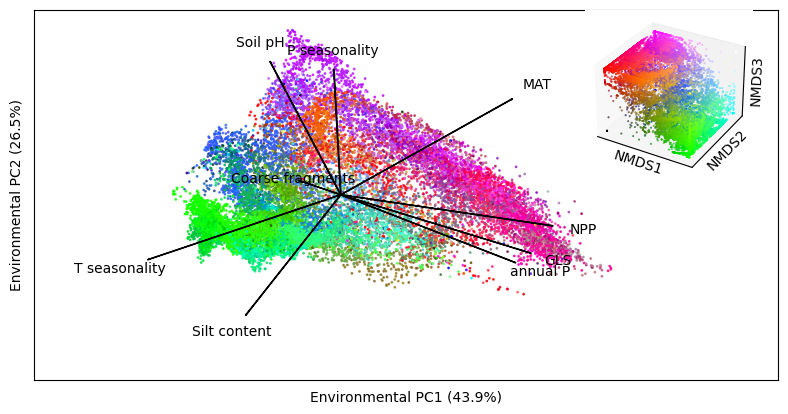

In [11]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(111)
s = ax1.scatter(x=pca_df['pc1'], y=pca_df['pc2'], c=C_nmds, s=1, alpha=0.8)
ax1.set(xlabel = "Environmental PC1 (" + str(pca_variance_explained.pc1.round(3) * 100) + "%)")
ax1.set(ylabel = "Environmental PC2 (" + str(pca_variance_explained.pc2.round(3) * 100) + "%)")
for r in pca_loadings.iterrows():
    ax1.arrow(0, 0, r[1]['pc1'], r[1]['pc2'], color = 'k')
    ax1.text(r[1]['pc1'] * 1.15, r[1]['pc2'] * 1.15, r[1]['var_name'], color = 'k', ha = 'center', va = 'center')
ax1.set(xlim = (-0.7, 1), ylim = (-0.7, 0.7), xticklabels=[], xticks=[], yticklabels=[], yticks=[])


r = [x[0] for x in C_nmds]
g = [x[1] for x in C_nmds]
b = [x[2] for x in C_nmds]

ax2 = fig.add_subplot(233, projection='3d')
ax2.scatter(g, b, r, c=C_nmds, s=0.2, alpha=0.8)
ax2.grid(False)
ax2.set(xticklabels=[], xticks=[], yticklabels=[],yticks=[], zticklabels=[], zticks=[])
ax2.set_xlabel('NMDS1', labelpad=-15)
ax2.set_ylabel('NMDS2', labelpad=-15)
ax2.set_zlabel('NMDS3', labelpad=-15)

plt.show()
# plt.savefig('../figures/nmds_pca.png')

In [12]:
C_evopca = np.array(pca_df[['evopca2_sc','evopca1_sc','evopca3_sc']])
C_evopca

array([[0.06565051, 0.        , 0.56824843],
       [0.07972856, 0.        , 0.55260378],
       [0.07883636, 0.        , 0.56009799],
       ...,
       [0.86203638, 0.29779317, 0.72855791],
       [0.89606512, 0.2202108 , 0.69429225],
       [0.89606512, 0.2202108 , 0.69429225]])

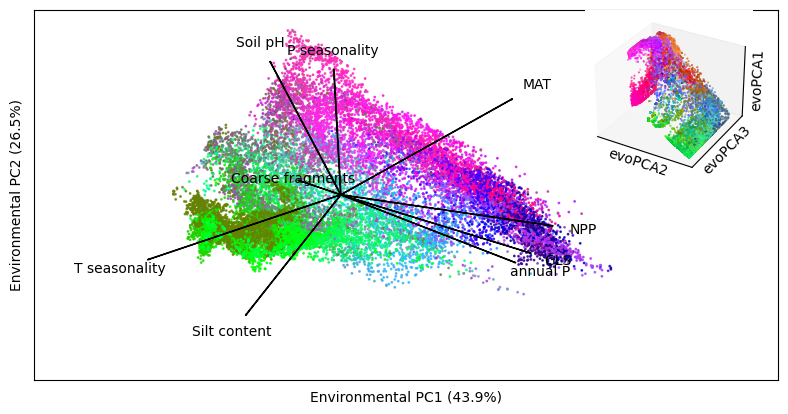

In [13]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(111)
s = ax1.scatter(x=pca_df['pc1'], y=pca_df['pc2'], c=C_evopca, s=1, alpha=0.8)
ax1.set(xlabel = "Environmental PC1 (" + str(pca_variance_explained.pc1.round(3) * 100) + "%)")
ax1.set(ylabel = "Environmental PC2 (" + str(pca_variance_explained.pc2.round(3) * 100) + "%)")
for r in pca_loadings.iterrows():
    ax1.arrow(0, 0, r[1]['pc1'], r[1]['pc2'], color = 'k')
    ax1.text(r[1]['pc1'] * 1.15, r[1]['pc2'] * 1.15, r[1]['var_name'], color = 'k', ha = 'center', va = 'center')
ax1.set(xlim = (-0.7, 1), ylim = (-0.7, 0.7), xticklabels=[], xticks=[], yticklabels=[], yticks=[])

r = [x[1] for x in C_evopca]
g = [x[0] for x in C_evopca]
b = [x[2] for x in C_evopca]

ax2 = fig.add_subplot(233, projection='3d')
ax2.scatter(r, b, g, c=C_nmds, s=0.2, alpha=0.8)
ax2.grid(False)
ax2.set(xticklabels=[], xticks=[], yticklabels=[],yticks=[], zticklabels=[], zticks=[])
ax2.set_xlabel('evoPCA2', labelpad=-15)
ax2.set_ylabel('evoPCA3', labelpad=-15)
ax2.set_zlabel('evoPCA1', labelpad=-15)

plt.show()
# plt.savefig('../figures/nmds_pca.png')